In [1]:
import os
import sys

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

import nibabel as nib
from matplotlib.colors import LinearSegmentedColormap


print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve

['/home/rfpred/notebooks/construction_work', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg']


In [2]:
NSP = NatSpatPred()
NSP.initialise(verbose=True)

rd = RegData
rl = Reloader

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


In [3]:
from funcs.pairwise_plots import connect_dots, bootstrap_analysis, bootstrap, bootstrap_t_onesample

In [4]:
#@title simulate example data
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# Set random seed for reproducibility
np.random.seed(42)

# Number of participants
n_participants = 40

# Generate data
subject_ids = np.repeat(range(1, n_participants + 1), 2)
conditions = np.tile(['A', 'B'], n_participants)

# Generate scores
scores = []
for condition in conditions:
    if condition == 'A':
        scores.append(np.random.uniform(5, 10))  # Higher scores for condition A
    else:
        scores.append(np.random.uniform(3, 7))   # Lower scores for condition B

# Create the dataframe
df = pd.DataFrame({
    'subject_id': subject_ids,
    'condition': conditions,
    'score': scores
})

# Sort the dataframe by subject_id and condition
df = df.sort_values(['subject_id', 'condition']).reset_index(drop=True)

# Display the first few rows of the dataframe
print(df.head(10))

# Display summary statistics
print(df.groupby('condition')['score'].describe())

   subject_id condition     score
0           1         A  6.872701
1           1         B  6.802857
2           2         A  8.659970
3           2         B  5.394634
4           3         A  5.780093
5           3         B  3.623978
6           4         A  5.290418
7           4         B  6.464705
8           5         A  8.005575
9           5         B  5.832290
           count      mean       std       min       25%       50%       75%  \
condition                                                                      
A           40.0  7.089317  1.485497  5.027611  5.761225  6.832515  8.149740   
B           40.0  5.055667  1.241248  3.185802  3.792130  5.068605  6.214988   

                max  
condition            
A          9.847923  
B          6.947548  


In [5]:
df

,subject_id,condition,score
0,1,A,6.872701
1,1,B,6.802857
2,2,A,8.659970
3,2,B,5.394634
4,3,A,5.780093
...,...,...,...
75,38,B,5.916029
76,39,A,8.856352
77,39,B,3.296179
78,40,A,6.792329


In [22]:
fov_df.reset_index(drop=True, inplace=True)
fov_df



,roi,delta_r_2,delta_r_3,delta_r_4,delta_r_5,delta_r_6,delta_r_7,delta_r_8,delta_r_9,delta_r_10,delta_r_11,delta_r_12,delta_r_13,delta_r_14,delta_r_15,delta_r_16,delta_r_17,source
0,V1,0.009064,0.010793,0.009263,0.008793,0.007900,0.008092,0.007968,0.007945,0.008180,0.007160,0.004479,0.000422,-0.000716,0.000040,0.009064,0.010793,Fovea
1,V1,0.003569,0.004463,0.003835,0.003605,0.003100,0.003414,0.003551,0.003634,0.003846,0.003313,0.001885,-0.000117,-0.000528,-0.000146,0.003569,0.004463,Fovea
2,V1,0.007876,0.008943,0.007970,0.007524,0.007343,0.008082,0.008209,0.008930,0.009721,0.009159,0.006687,0.001982,0.000301,0.000626,0.007876,0.008943,Fovea
3,V1,0.005216,0.005923,0.005106,0.004792,0.004450,0.004774,0.004839,0.005144,0.005512,0.005203,0.003773,0.001153,0.000215,0.000651,0.005216,0.005923,Fovea
4,V1,0.007513,0.008373,0.007308,0.006925,0.006533,0.006906,0.007005,0.007232,0.007458,0.006997,0.005352,0.002078,0.000724,0.000977,0.007513,0.008373,Fovea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,V4,0.017371,0.017439,0.016596,0.015986,0.015919,0.016296,0.015990,0.016406,0.016791,0.016991,0.016818,0.013902,0.011345,0.012082,0.017371,0.017439,Fovea
2522,V4,0.000104,0.000096,-0.000040,-0.000066,-0.000047,-0.000071,-0.000206,-0.000224,-0.000214,-0.000259,-0.000361,-0.000643,-0.000704,-0.000327,0.000104,0.000096,Fovea
2523,V4,0.012382,0.012816,0.011608,0.011001,0.010836,0.011066,0.010532,0.011070,0.011903,0.012274,0.012072,0.009605,0.007624,0.008220,0.012382,0.012816,Fovea
2524,V4,0.016985,0.016672,0.015461,0.014728,0.015237,0.015516,0.014670,0.015540,0.016606,0.017641,0.018719,0.017075,0.014996,0.016228,0.016985,0.016672,Fovea


/tmp/ipykernel_3987139/4239516632.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = df.groupby("subject_id").apply(


{'mean                    ': 2.0336498958970095,
 '95%_CI around mean      ': (1.3693214140753065, 2.6635437213858872),
 'bootstrap-t-test p_value': 'p < 0.0001'}

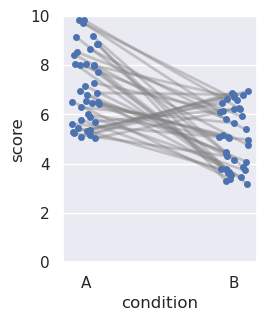

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(2.5, 3.2))
ax = sns.stripplot(data=df, y="score", x="condition")
connect_dots(ax)  # use the connect_dots fucntion
plt.ylim(0, 10)
pairwise_diff = df.groupby("subject_id").apply(
    lambda x: x[x["condition"] == "A"]["score"].values[0]
    - x[x["condition"] == "B"]["score"].values[0]
)

# perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
bootstrap_analysis(
    pairwise_diff.values,
)  # alternatively, do: tail='r' to test for delta>0 (one-sided)
# the string below reports the mean, and 95%CI around the mean, of the delta, per subject

In [7]:
df[df['condition']=='A']['score']

0     6.872701
2     8.659970
4     5.780093
6     5.290418
8     8.005575
10    5.102922
12    9.162213
14    5.909125
16    6.521211
18    7.159725
20    8.059264
22    6.460723
24    7.280350
26    5.998369
28    7.962073
30    8.037724
32    5.325258
34    9.828160
36    6.523069
38    8.421165
40    5.610191
42    5.171943
44    6.293900
46    6.558555
48    7.733551
50    9.847923
52    9.697495
54    7.989500
56    5.442463
58    5.226136
60    6.943386
62    9.143688
64    6.404673
66    5.704621
68    5.372753
70    8.861224
72    5.027611
74    8.534287
76    8.856352
78    6.792329
Name: score, dtype: float64

In [8]:
from funcs.analyses import _get_fovea_df, _get_peri_df

In [94]:
fov_df = _get_fovea_df("subj01", 
                       statistic = "delta_r",
                       aggregate_layers = False,
                       mean_stats=False)

# fov_df
# fov_df[fov_df["roi"] == "V1"]

fov_df.reset_index(drop=True, inplace=True)
fov_df

# Get the mean over all columns that begin with delta_r_
fov_df["mean_delta_r"] = fov_df.filter(like="delta_r_").mean(axis=1)

fov_df.drop(columns=fov_df.filter(like="delta_r_"), inplace=True)
fov_df

# add index column
fov_df["index"] = fov_df.index

fov_df


def prep_df(dataframe):
    dataframe.reset_index(drop=True, inplace=True)
    dataframe["mean_delta_r"] = dataframe.filter(like="delta_r_").mean(axis=1)
    dataframe.drop(columns=dataframe.filter(like="delta_r_"), inplace=True)
    dataframe["index"] = dataframe.index
    return dataframe



In [96]:
fov_df = _get_fovea_df("subj01", 
                       statistic = "delta_r",
                       aggregate_layers = False,
                       mean_stats=False)

prep_df(fov_df)

,roi,source,mean_delta_r,index
0,V1,Fovea,0.006827,0
1,V1,Fovea,0.002841,1
2,V1,Fovea,0.006886,2
3,V1,Fovea,0.004243,3
4,V1,Fovea,0.006079,4
...,...,...,...,...
2521,V4,Fovea,0.015921,2521
2522,V4,Fovea,-0.000173,2522
2523,V4,Fovea,0.011138,2523
2524,V4,Fovea,0.016233,2524


In [90]:
from operator import index
subject = "subj02"

peri_df = _get_peri_df(subject, 
                       statistic = "delta_r",
                       aggregate_layers = False,
                       angles = [90, 210, 330],
                       mean_stats=False)



# peri_df[peri_df["roi"] == "V1"]

peri_df.reset_index(drop=True, inplace=True)
peri_df

# Get the mean over all columns that begin with delta_r_
peri_df["mean_delta_r"] = peri_df.filter(like="delta_r_").mean(axis=1)

peri_df.drop(columns=peri_df.filter(like="delta_r_"), inplace=True)
peri_df

# add index column
peri_df["index"] = peri_df.index

peri_df

,roi,source,mean_delta_r,index
0,V1,Parafovea,0.002910,0
1,V1,Parafovea,0.001048,1
2,V1,Parafovea,0.001236,2
3,V1,Parafovea,0.001001,3
4,V1,Parafovea,0.000223,4
...,...,...,...,...
1400,V4,Parafovea,-0.000225,1400
1401,V4,Parafovea,0.001792,1401
1402,V4,Parafovea,-0.000262,1402
1403,V4,Parafovea,0.001196,1403


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(2.5, 3.2))
# ax = sns.stripplot(data=df, y="score", x="condition")

# ax = sns.stripplot(data=peri_df, y="mean_delta_r", x="roi")
# connect_dots(ax)  # use the connect_dots fucntion
# plt.ylim(0, .03)


pairwise_diff = df.groupby("subject_id").apply(
    lambda x: x[x["condition"] == "A"]["score"].values[0]
    - x[x["condition"] == "B"]["score"].values[0]
)

pairwise_diff = df.groupby("subject_id").apply(
    lambda x: x[x["condition"] == "A"]["score"].values[0]
    - x[x["condition"] == "B"]["score"].values[0]
)


pairwise_diff.values

/tmp/ipykernel_3987139/3311688549.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = df.groupby("subject_id").apply(
/tmp/ipykernel_3987139/3311688549.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = df.groupby("subject_id").apply(


array([ 0.06984337,  3.26533577,  2.15611512, -1.17428652,  2.17328475,
       -1.77671694,  5.31285676,  2.1755068 ,  1.42218549,  2.99480853,
        4.50128903,  1.99527587,  1.13964608,  0.94143116,  4.77627119,
        4.35562776, -1.47028418,  3.59457077,  3.13238039,  3.66055516,
        0.62948353, -1.465339  ,  0.64381077,  1.4782833 ,  3.99413357,
        3.74739185,  3.11818531,  1.30200295,  1.65853106,  0.92481512,
        2.85799032,  4.71667424,  1.23388822, -0.5041668 , -1.57479453,
        5.06636112, -1.23423513,  2.61825805,  5.56017313,  3.3288524 ])

<Figure size 250x320 with 0 Axes>

In [25]:
# perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
bootstrap_analysis(
    pairwise_diff.values,
)  # alternatively, do: tail='r' to test for delta>0 (one-sided)
# the string below reports the mean, and 95%CI around the mean, of the delta, per subject

{'mean                    ': 2.0336498958970095,
 '95%_CI around mean      ': (1.3693214140753065, 2.6635437213858872),
 'bootstrap-t-test p_value': 'p < 0.0001'}

In [74]:

def select_roi(dataframe, roi):
    return dataframe[dataframe["roi"] == roi]["mean_delta_r"]


def fov_roi(roi):
    return fov_df[fov_df["roi"] == roi]["mean_delta_r"]


pfov_roi("V1")

fov_roi("V1")

0      0.006827
1      0.002841
2      0.006886
3      0.004243
4      0.006079
         ...   
432    0.004627
433    0.002698
434    0.004133
435    0.003033
436    0.009057
Name: mean_delta_r, Length: 437, dtype: float64

In [20]:
pfov = peri_df["mean_delta_r"].values
fov = fov_df["mean_delta_r"].values
# print(peri_df["mean_delta_r"])
# print(fov_df["mean_delta_r"])

type(fov)



numpy.ndarray

In [31]:
boot_pfov = bootstrap(pfov)
boot_fov = bootstrap(fov)

In [36]:
np.mean(boot_pfov), np.mean(boot_fov)

bootstrap_analysis(pfov, np.mean(boot_fov))

{'mean                    ': 0.01263910422200226,
 '95%_CI around mean      ': (0.011962615028244618, 0.013314778084410844),
 'bootstrap-t-test p_value': 'p < 0.0001'}

In [38]:
# COPILOT VERSION


def bootstrap_t_test(arr1, arr2, num_bootstrap=10000):
    # Calculate the observed test statistic (difference in means)
    observed_diff = np.mean(arr1) - np.mean(arr2)
    
    # Combine the arrays
    combined = np.concatenate([arr1, arr2])
    
    # Initialize an array to store bootstrap test statistics
    bootstrap_diffs = np.zeros(num_bootstrap)
    
    # Perform bootstrap resampling
    for i in range(num_bootstrap):
        # Resample with replacement
        resample1 = np.random.choice(combined, size=len(arr1), replace=True)
        resample2 = np.random.choice(combined, size=len(arr2), replace=True)
        
        # Calculate the test statistic for the resample
        bootstrap_diffs[i] = np.mean(resample1) - np.mean(resample2)
    
    # Calculate the p-value
    p_value = np.mean(np.abs(bootstrap_diffs) >= np.abs(observed_diff))
    
    return observed_diff, p_value

# Example usage with pfov and fov arrays
pfov = peri_df["mean_delta_r"].values
fov = fov_df["mean_delta_r"].values

observed_diff, p_value = bootstrap_t_test(pfov, fov)
print(f'Observed difference in means: {observed_diff}')
print(f'Bootstrap p-value: {p_value}')

Observed difference in means: 0.0033231116602866657
Bootstrap p-value: 0.0


In [50]:
from scipy.stats import ttest_ind

# Example arrays
# arr1 = np.random.randn(100)
# arr2 = np.random.randn(80)
arr1 = pfov
arr2 = fov

# Perform Welch's t-test
t_stat, p_value = ttest_ind(arr1, arr2, equal_var=False)
print(f"Welch's t-test p-value: {p_value}")

Welch's t-test p-value: 3.0128450652025653e-19


In [51]:
from scipy.stats import mannwhitneyu

# Example arrays
# arr1 = np.random.randn(100)
# arr2 = np.random.randn(80)

# Perform Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(arr1, arr2)
print(f"Mann-Whitney U Test p-value: {p_value}")

Mann-Whitney U Test p-value: 1.732729365092315e-15


In [52]:
from sklearn.utils import resample

def permutation_test(arr1, arr2, num_permutations=10000):
    observed_diff = np.mean(arr1) - np.mean(arr2)
    combined = np.concatenate([arr1, arr2])
    count = 0
    
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        perm_sample1 = combined[:len(arr1)]
        perm_sample2 = combined[len(arr1):]
        perm_diff = np.mean(perm_sample1) - np.mean(perm_sample2)
        if np.abs(perm_diff) >= np.abs(observed_diff):
            count += 1
    
    p_value = count / num_permutations
    return observed_diff, p_value

observed_diff, p_value = permutation_test(arr1, arr2)
print(f"Permutation Test p-value: {p_value}")

Permutation Test p-value: 0.0


In [78]:
from sklearn.utils import resample
import numpy as np

def permutation_test_one_sided(arr1, arr2, num_permutations=10000):
    """Perform a one-sided permutation test for the difference in means between two arrays.

    Args:
        arr1 (np.ndarray): Array of which we test whether the mean is greater than the mean of arr2.
        arr2 (np.ndarray): Array of which we test whether the mean is smaller than the mean of arr1.
        num_permutations (int, optional): _description_. Defaults to 10000.

    Returns:
        _type_: _description_
    """    
    # observed_diff = np.mean(arr2) - np.mean(arr1)
    observed_diff = np.mean(arr1) - np.mean(arr2)
    combined = np.concatenate([arr1, arr2])
    count = 0
    
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        perm_sample1 = combined[:len(arr1)]
        perm_sample2 = combined[len(arr1):]
        perm_diff = np.mean(perm_sample2) - np.mean(perm_sample1)
        if perm_diff >= observed_diff:
            count += 1
    
    p_value = count / num_permutations
    return observed_diff, p_value

# Example arrays
# arr1 = np.random.randn(100)
# arr2 = np.random.randn(80) + 0.5  # Adding a shift to make arr2 larger on average

observed_diff, p_value = permutation_test_one_sided(arr1, arr2)
print(f"Observed Difference: {observed_diff}")
print(f"Permutation Test p-value: {p_value}")

Observed Difference: 0.0033231116602866657
Permutation Test p-value: 0.0


V1
Observed Difference: 0.008893614602033908
Permutation Test p-value: 0.0
V2
Observed Difference: 0.00032515431448880677
Permutation Test p-value: 0.4167
V3
Observed Difference: -0.004035559406403259
Permutation Test p-value: 0.0
V4
Observed Difference: -0.006635106010688789
Permutation Test p-value: 0.0


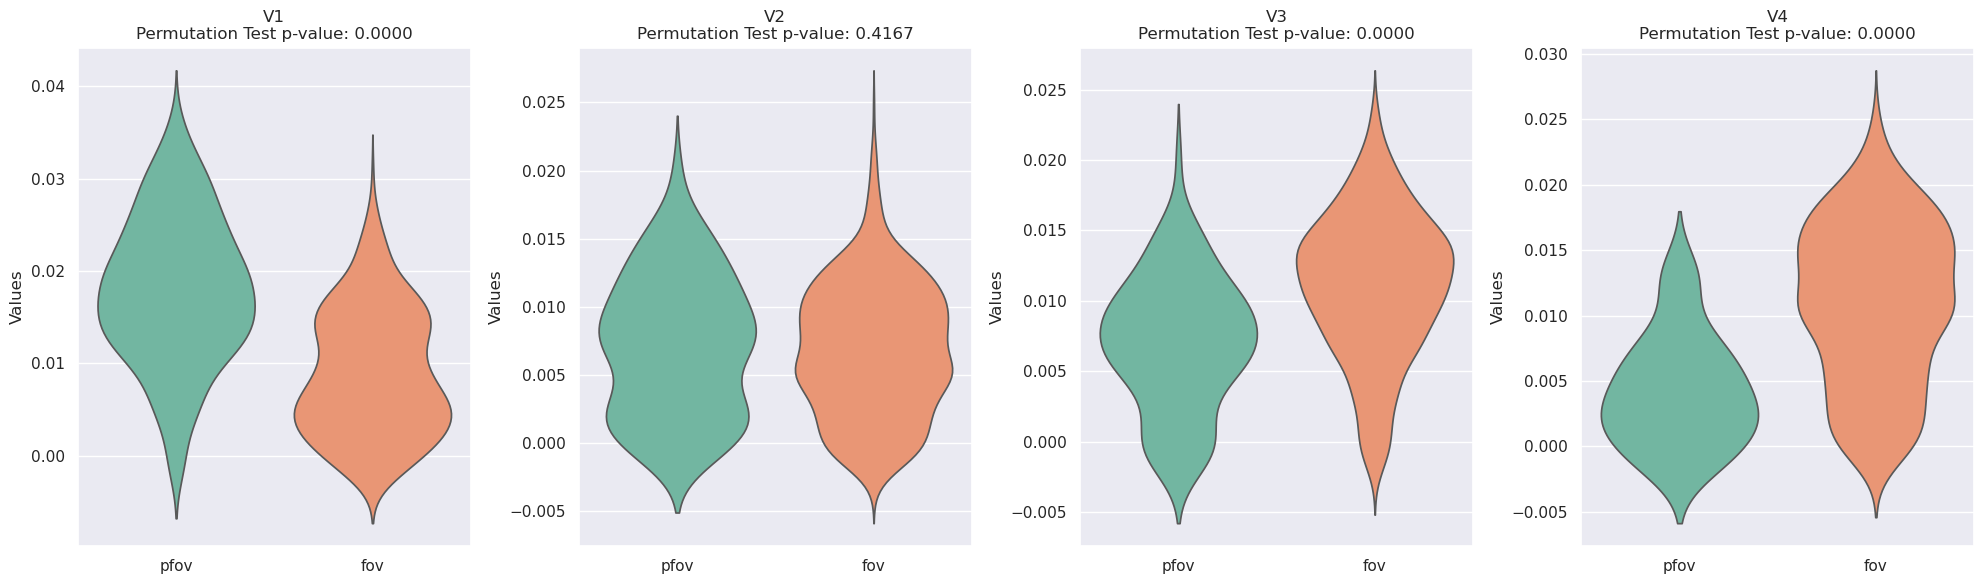

V1
Observed Difference: 0.01001287626776349
Permutation Test p-value: 0.0
V2
Observed Difference: -0.0030130799954977776
Permutation Test p-value: 0.0
V3
Observed Difference: -0.007834877925605967
Permutation Test p-value: 0.0
V4
Observed Difference: -0.009558572042808496
Permutation Test p-value: 0.0


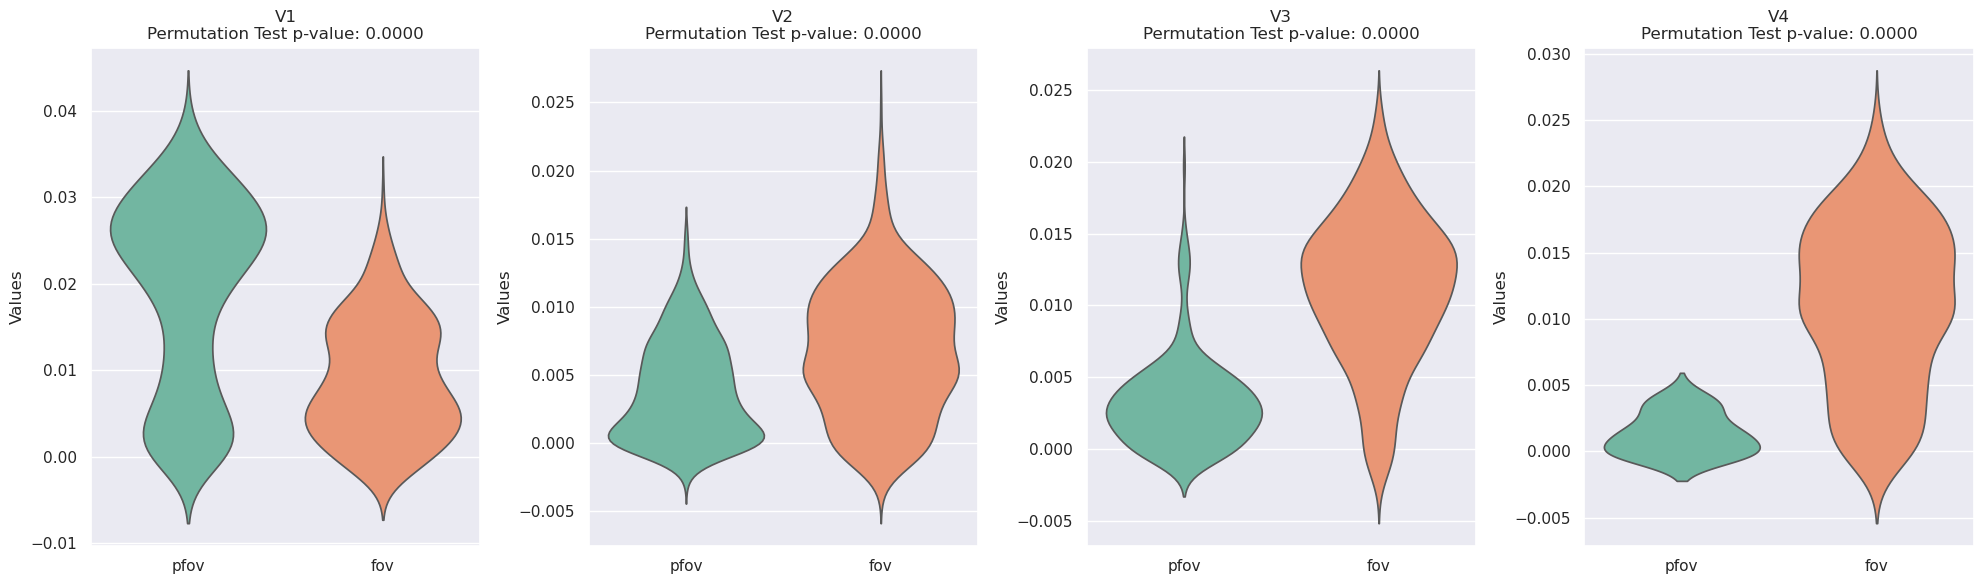

V1
Observed Difference: 0.00786054218573168
Permutation Test p-value: 0.0
V2
Observed Difference: 0.002000518683892144
Permutation Test p-value: 0.0
V3
Observed Difference: -0.00301973756998721
Permutation Test p-value: 0.0
V4
Observed Difference: -0.008445862555818168
Permutation Test p-value: 0.0


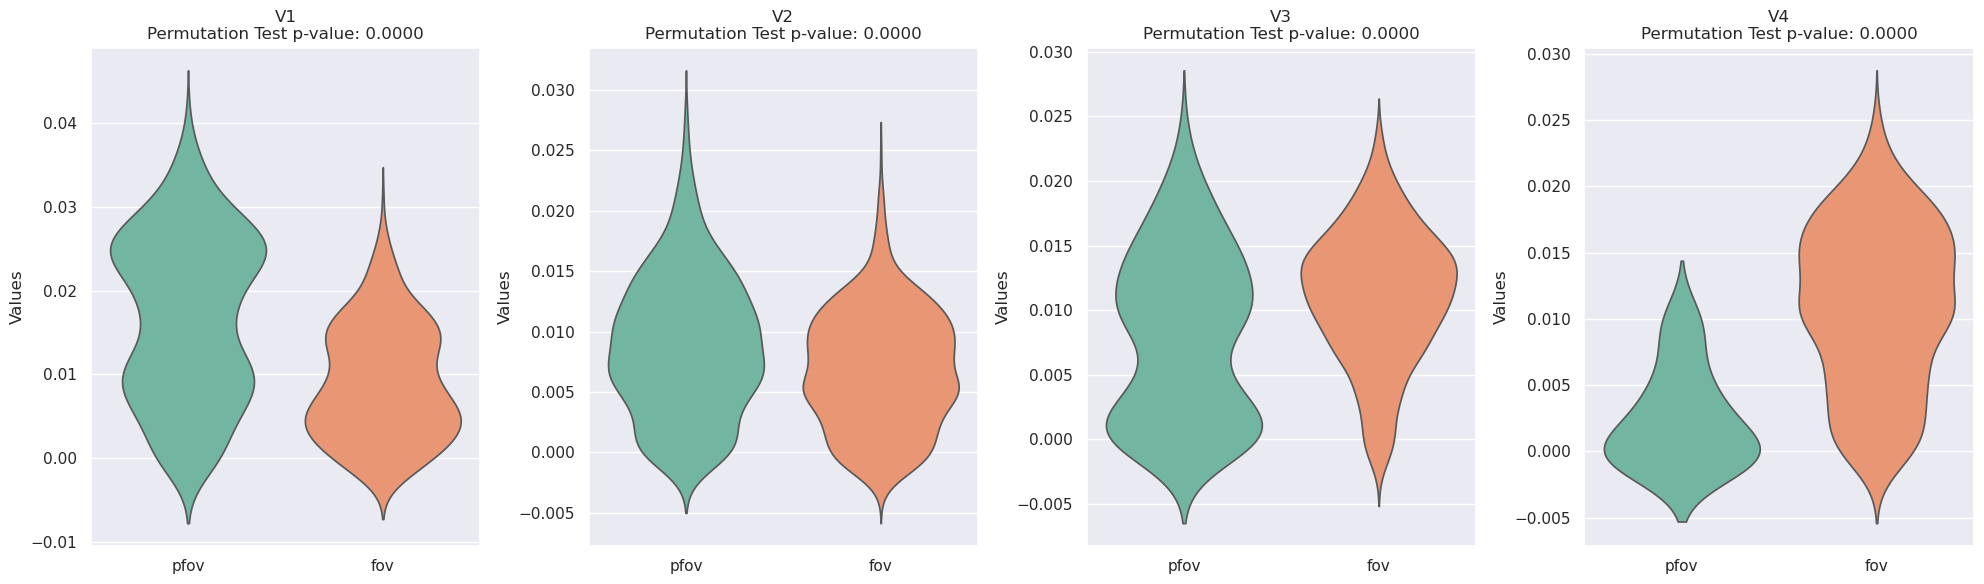

V1
Observed Difference: 0.004167820990484019
Permutation Test p-value: 0.0
V2
Observed Difference: 0.000461691181141915
Permutation Test p-value: 0.1531
V3
Observed Difference: -0.00844747382835082
Permutation Test p-value: 0.0
V4
Observed Difference: -0.011841568197394422
Permutation Test p-value: 0.0


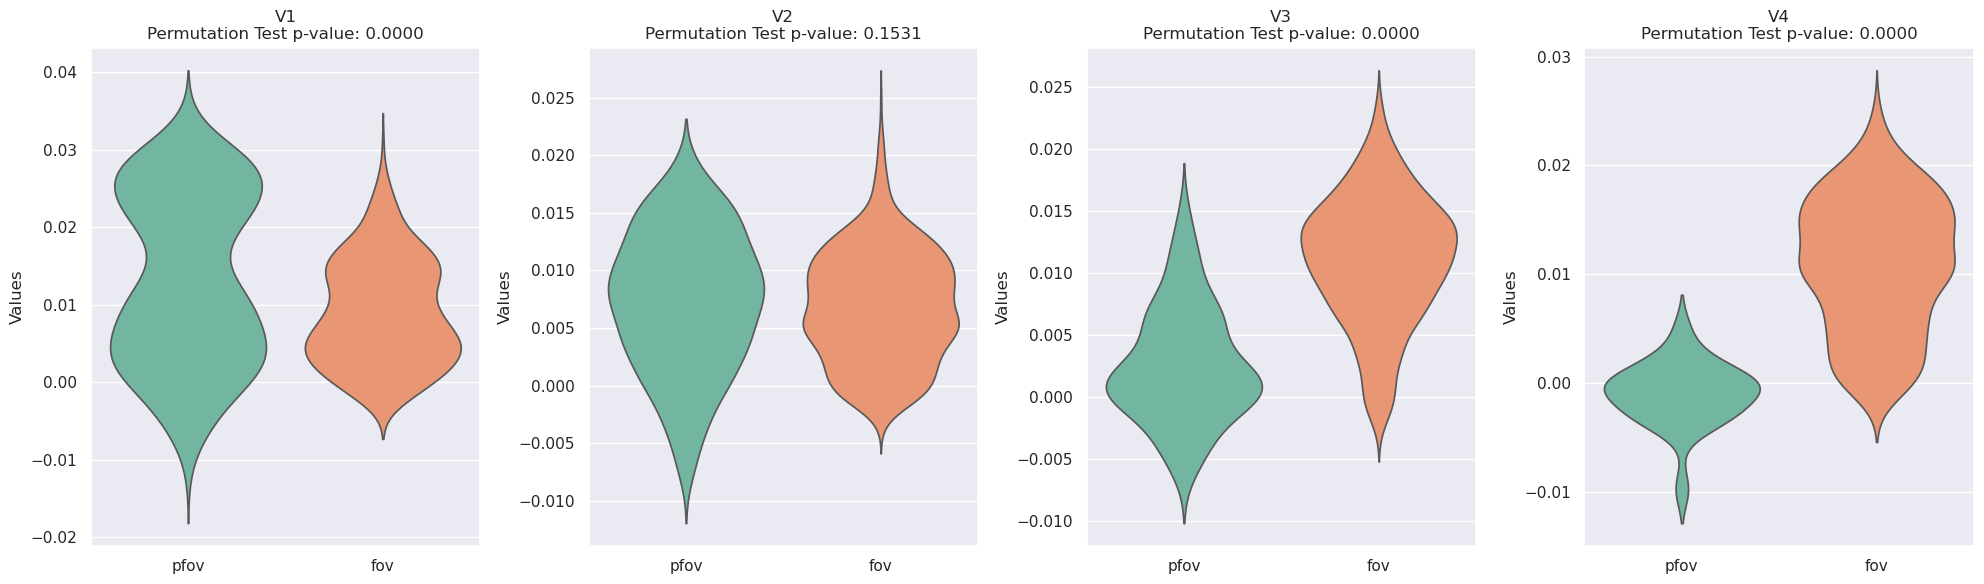

V1
Observed Difference: 0.014660067393828734
Permutation Test p-value: 0.0
V2
Observed Difference: 0.001387110772066439
Permutation Test p-value: 0.0001
V3
Observed Difference: -0.004516673922376455
Permutation Test p-value: 0.0
V4
Observed Difference: -0.01094082452893822
Permutation Test p-value: 0.0


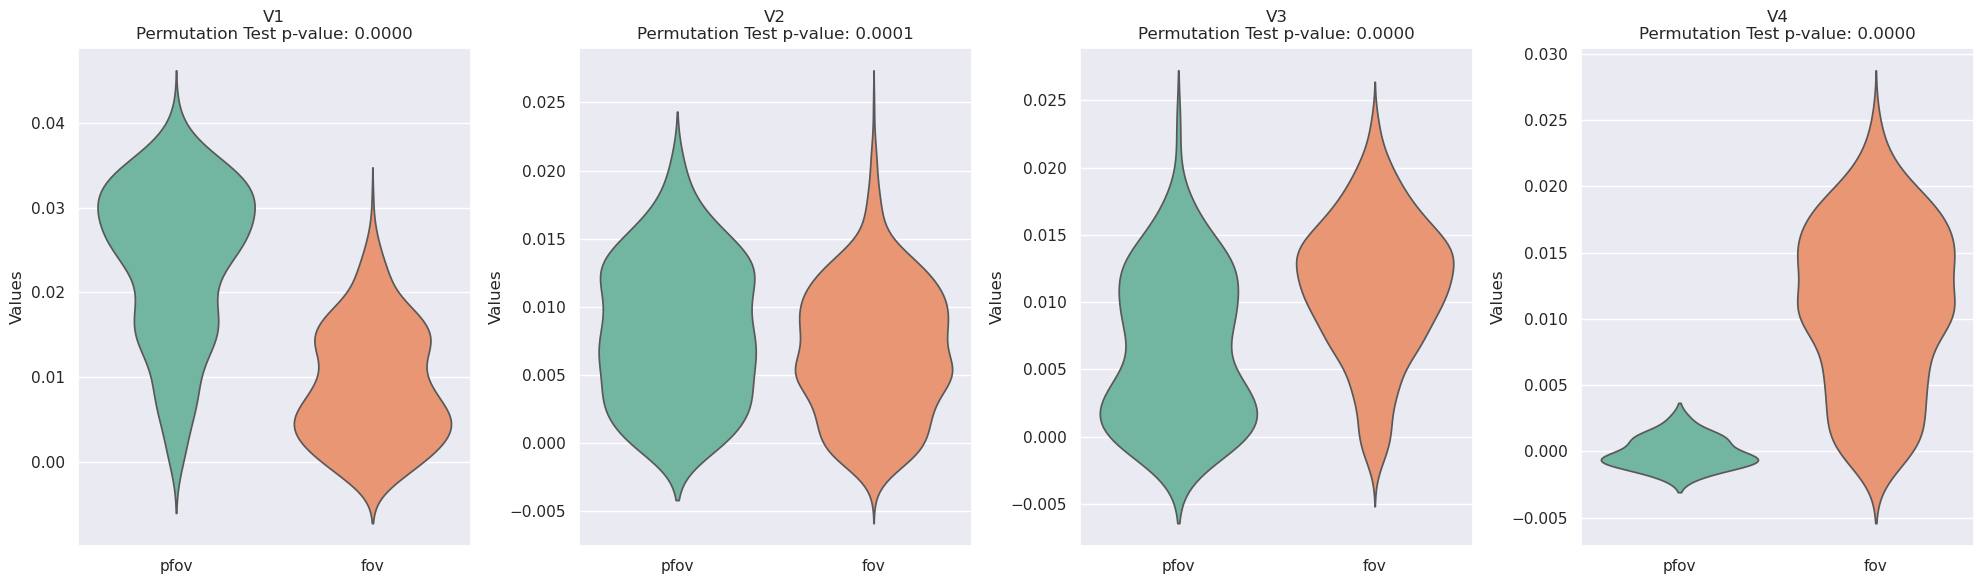

V1
Observed Difference: 0.00833160554473318
Permutation Test p-value: 0.0
V2
Observed Difference: -0.0018509234605544184
Permutation Test p-value: 0.0
V3
Observed Difference: -0.005980260757426673
Permutation Test p-value: 0.0
V4
Observed Difference: -0.011611611509061754
Permutation Test p-value: 0.0


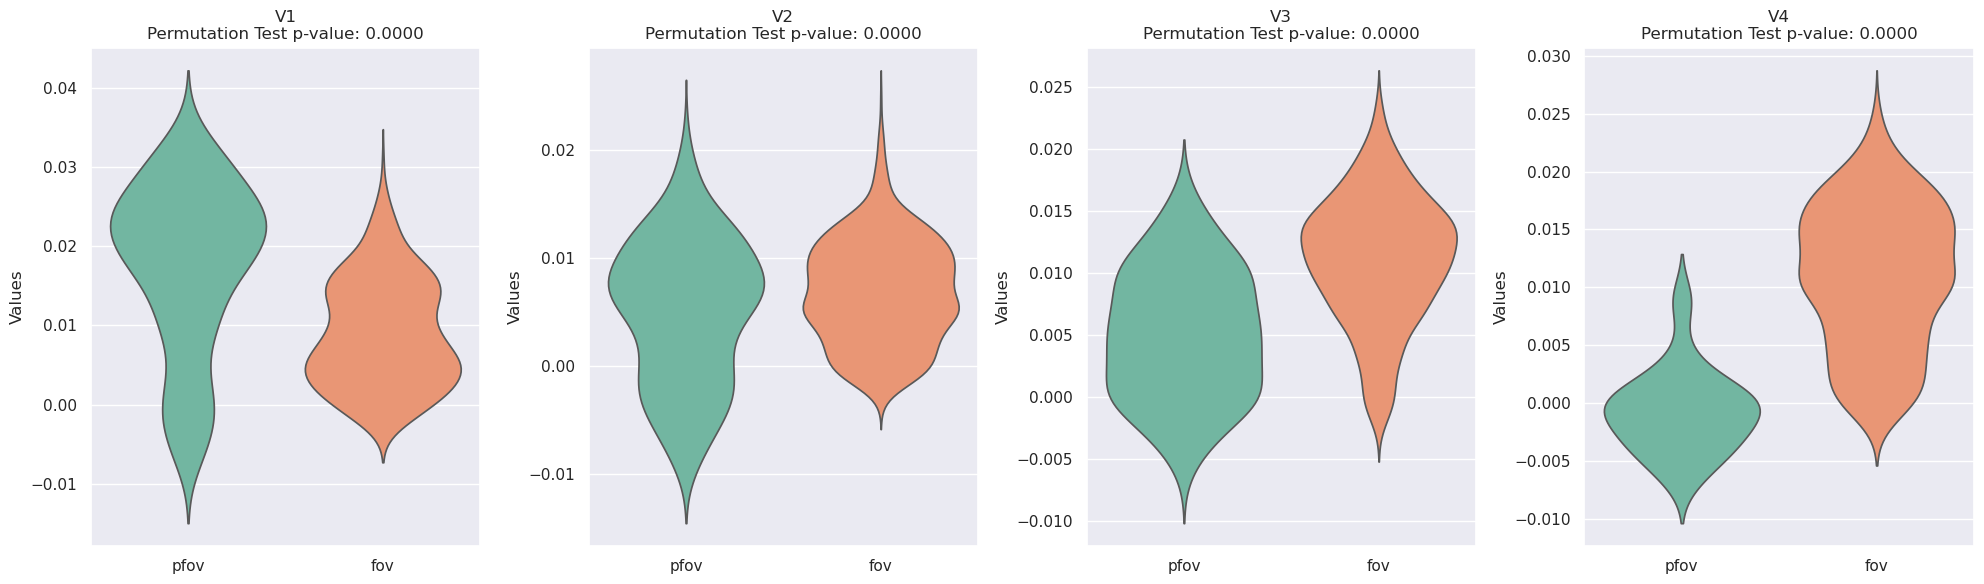

V1
Observed Difference: 0.006559084428669414
Permutation Test p-value: 0.0
V2
Observed Difference: 0.0011728826322683194
Permutation Test p-value: 0.0035
V3
Observed Difference: -0.005032170035510549
Permutation Test p-value: 0.0
V4
Observed Difference: -0.007031902452716463
Permutation Test p-value: 0.0


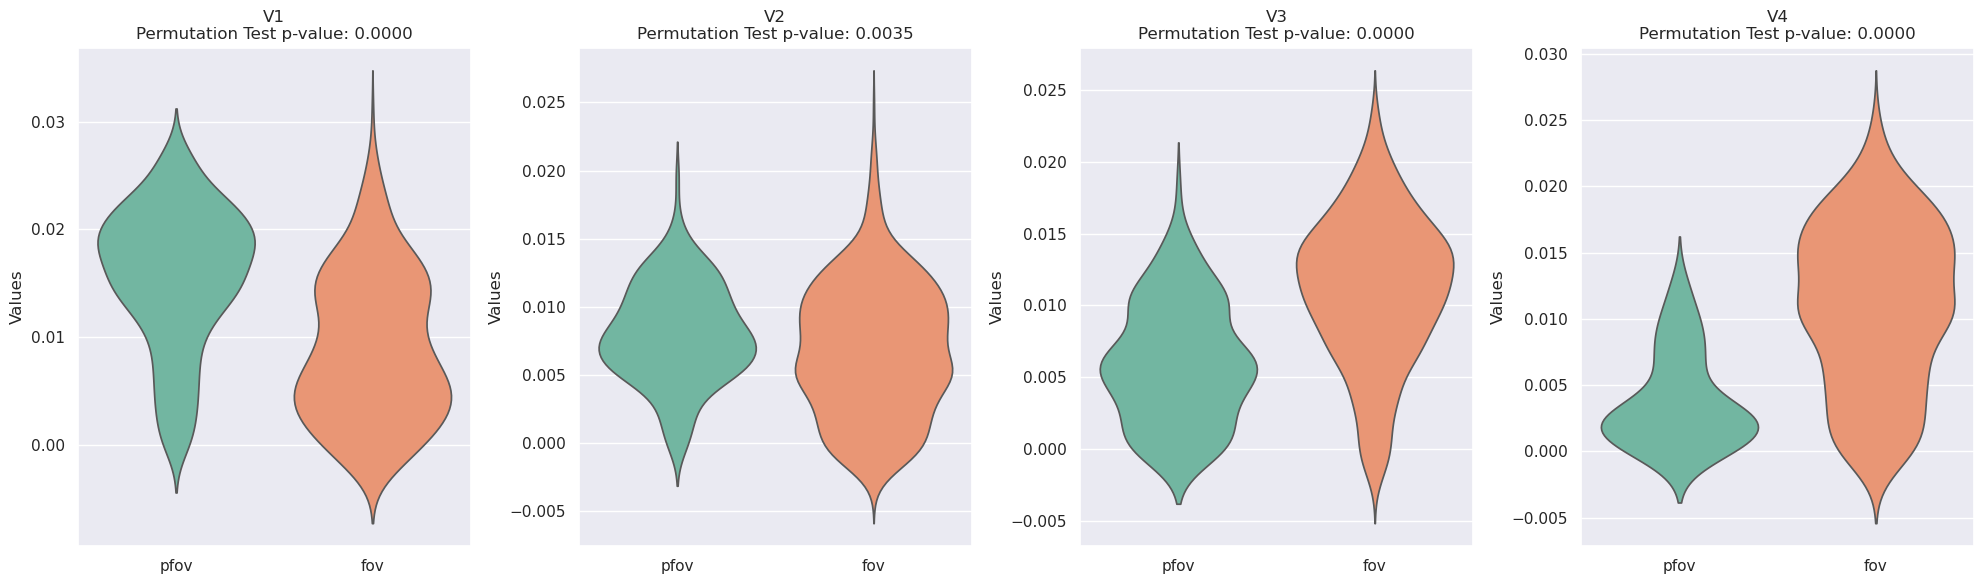

V1
Observed Difference: 0.006829534075497216
Permutation Test p-value: 0.0
V2
Observed Difference: -0.00019803457041979878
Permutation Test p-value: 0.5081
V3
Observed Difference: -0.00589351049577957
Permutation Test p-value: 0.0
V4
Observed Difference: -0.008976637471974884
Permutation Test p-value: 0.0


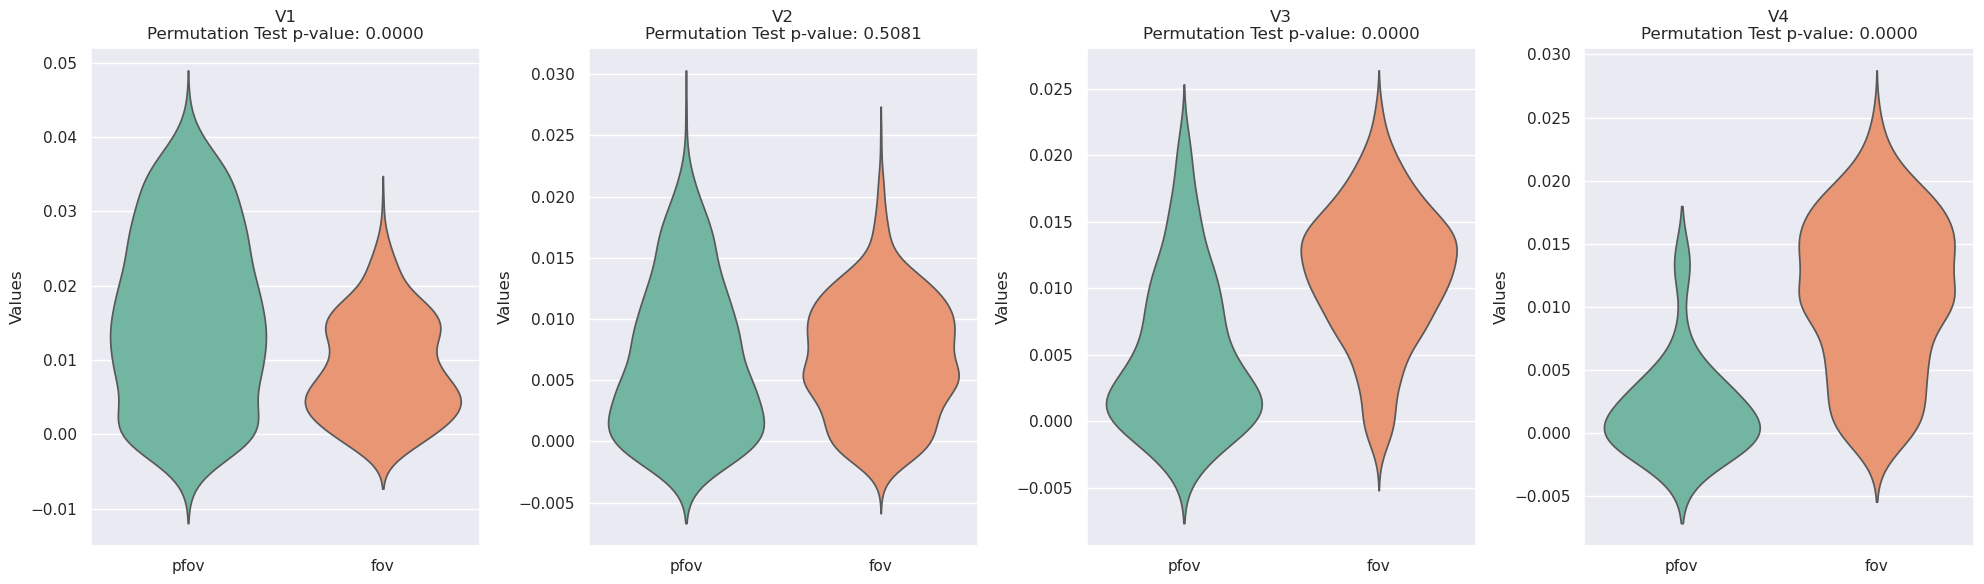

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.utils import resample

def permutation_test(arr1, arr2, num_permutations=10000):
    observed_diff = np.mean(arr1) - np.mean(arr2)
    combined = np.concatenate([arr1, arr2])
    count = 0
    
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        perm_sample1 = combined[:len(arr1)]
        perm_sample2 = combined[len(arr1):]
        perm_diff = np.mean(perm_sample1) - np.mean(perm_sample2)
        if np.abs(perm_diff) >= np.abs(observed_diff):
            count += 1
    
    p_value = count / num_permutations
    return observed_diff, p_value


def select_roi(dataframe, roi):
    return dataframe[dataframe["roi"] == roi]["mean_delta_r"]


# Example arrays
# arr1 = np.random.randn(100)
# arr2 = np.random.randn(80)

# observed_diff, p_value = permutation_test(arr1, arr2)
# print(f"Permutation Test p-value: {p_value}")

for subject in NSP.subjects:

    pfov_df_full = _get_peri_df(subject, 
                        statistic = "delta_r",
                        aggregate_layers = False,
                        angles = [90, 210, 330],
                        mean_stats=False)

    fov_df_full = _get_fovea_df("subj01", 
                        statistic = "delta_r",
                        aggregate_layers = False,
                        mean_stats=False)

    fov_df = prep_df(fov_df_full)
    pfov_df = prep_df(pfov_df_full)

    # Prepare the figure with 1 row and 4 columns
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))

    for i, roi in enumerate(peri_df["roi"].unique()):
        if i >= 4:  # Limit to 4 plots
            break
        
        print(roi)
    
        larg_arr = select_roi(pfov_df, roi)
        small_arr = select_roi(fov_df, roi)
        
        #(LARGER, SMALLER)
        observed_diff, p_value = permutation_test(larg_arr, small_arr)
        print(f"Observed Difference: {observed_diff}")
        print(f"Permutation Test p-value: {p_value}")
        
        # Prepare data for violin plot
        data = pd.DataFrame({'Values': np.concatenate([larg_arr, small_arr]),
                            'Group': ['pfov'] * len(larg_arr) + ['fov'] * len(small_arr)})
        
        # sns.violinplot(x='Group', y='Values', data=data, inner=None, palette="Set2", ax=axes[i])
        sns.violinplot(x='Group', y='Values', data=data, inner=None, palette="Set2", hue="Group", ax=axes[i])
        axes[i].set_title(f'{roi}\nPermutation Test p-value: {p_value:.4f}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Values')

    plt.tight_layout()
    plt.show()

In [53]:
from scipy.stats import ks_2samp

# Example arrays
# arr1 = np.random.randn(100)
# arr2 = np.random.randn(80)

# Perform Kolmogorov-Smirnov Test
ks_stat, p_value = ks_2samp(arr1, arr2)
print(f"Kolmogorov-Smirnov Test p-value: {p_value}")

Kolmogorov-Smirnov Test p-value: 1.3541341002744583e-17


0.01263910422200226 0.009315992561715595


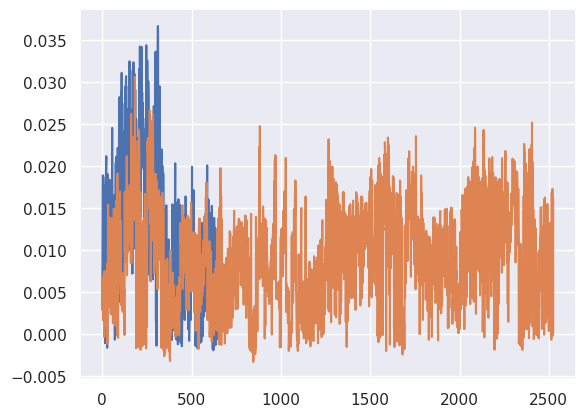

In [57]:
plt.plot(pfov)
plt.plot(fov)

print(np.mean(pfov), np.mean(fov))  

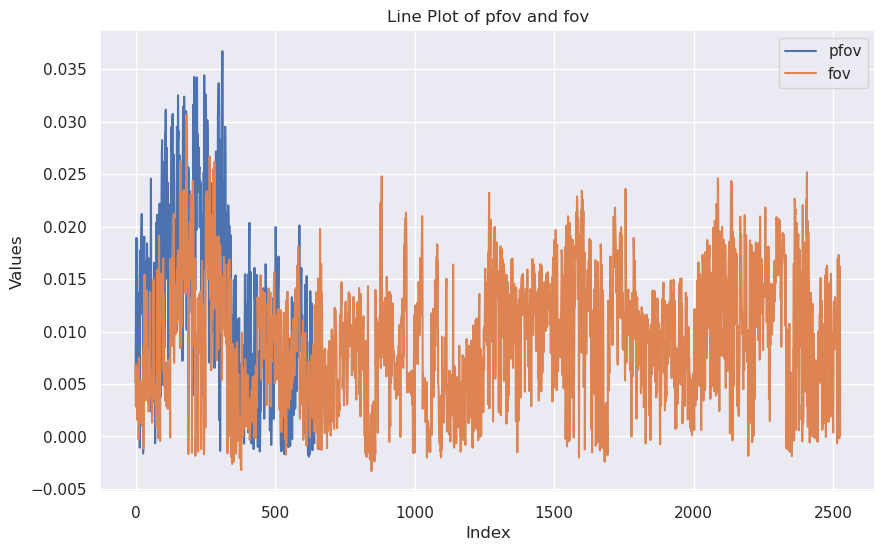

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pfov, label='pfov')
plt.plot(fov, label='fov')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of pfov and fov')
plt.legend()
plt.show()

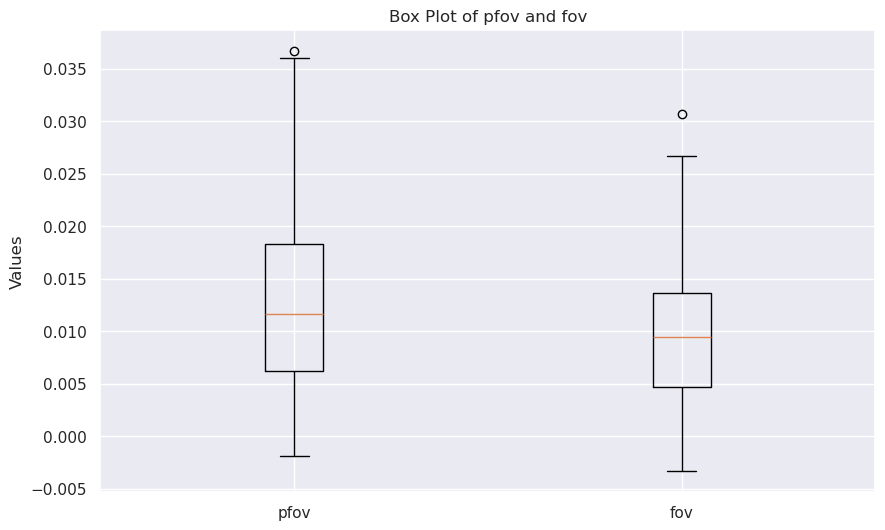

In [60]:
plt.figure(figsize=(10, 6))
plt.boxplot([pfov, fov], labels=['pfov', 'fov'])
plt.ylabel('Values')
plt.title('Box Plot of pfov and fov')
plt.show()

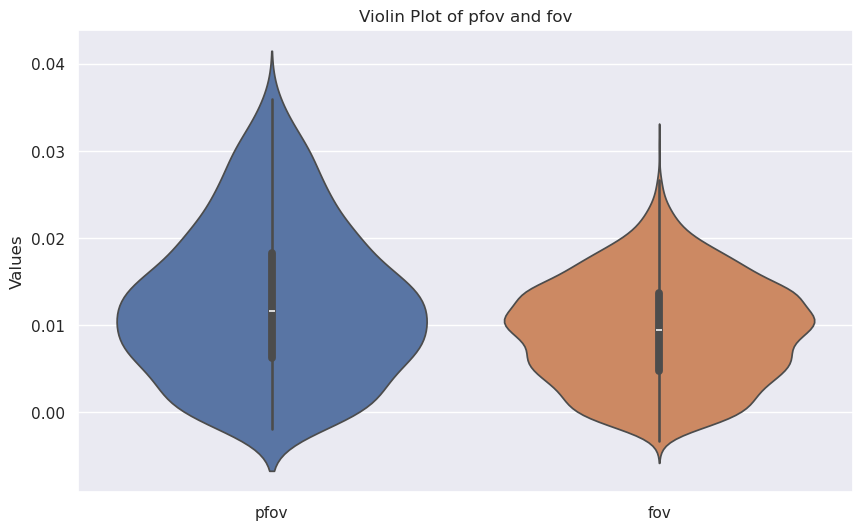

In [61]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(data=[pfov, fov])
plt.xticks([0, 1], ['pfov', 'fov'])
plt.ylabel('Values')
plt.title('Violin Plot of pfov and fov')
plt.show()

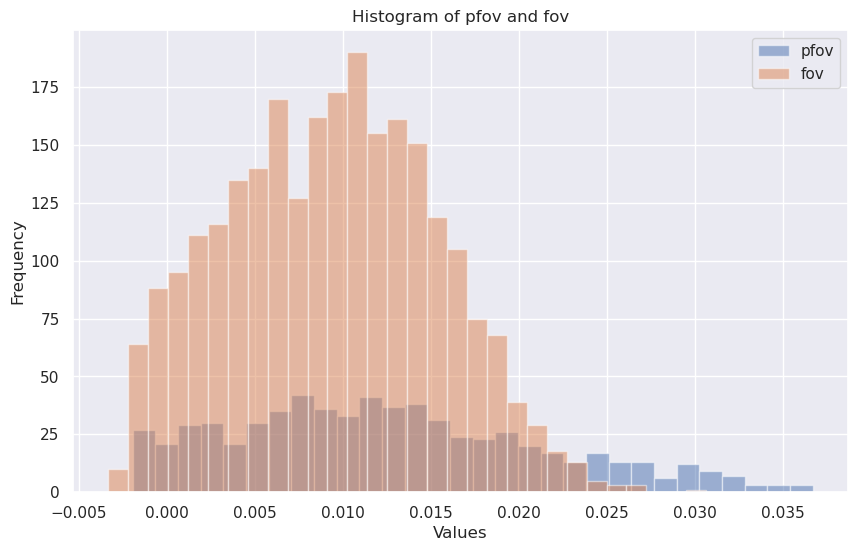

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(pfov, bins=30, alpha=0.5, label='pfov')
plt.hist(fov, bins=30, alpha=0.5, label='fov')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of pfov and fov')
plt.legend()
plt.show()